## Overview

For my final Codecademy data analysis project, I wanted to work with data about dinosaurs. In this project, I used data from the 2020 publication *Ten more years of discovery: revisiting the quality of the sauropodomorph dinosaur fossil record* available on [Dryad](https://datadryad.org/stash/dataset/doi:10.5061%2Fdryad.6hdr7sqxb).

This dataset collects information regarding 305 individual species of sauropodomorphs (long-necked dinosaurs and their relatives), including geographic location, size, and age of fossil. The information comes from 1144 individual specimens, and the paper is mainly looking at how complete each fossil is. 

For my analysis, I'll mostly be looking at the summary information as well as the information on each individual fossil. The initial questions I'll try to answer are:

- How did size and diversity of sauropodomorphs change throughout the Mezozoic Era?
- Which clades of sauropodomorphs do we have the most fossil specimens of?
- Has the rate of discovery of species increased or decreased since we identified the first sauropodomorph?
- Where did the oldest sauropodomorphs live, and how did they spread across the globe?
- What bones are the most likely to fossilize, based on the fossil specimens we have found so far?

## Importing and Examining the Cleaned Data

I already cleaned and re-exported the data as cleaned csvs in the file Final Project - Sauropod Data Cleaning. Like I did in that project, I'll start by importing some common libraries for data analysis and visualization. Then, I'll import the cleaned data.

I have already removed excess columns from the data and checked for null and duplicate values, so it should be pretty clean. However, I want to take another look to make sure there's nothing I missed, especially with the summary_df since that contains many categorical variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
summary_df = pd.read_csv('summary_df.csv')
completeness_df = pd.read_csv('completeness_df.csv')

In [3]:
summary_df.head()

,main_clade,sub_clade,taxa,year_found,completeness,hemisphere,continent,country,mod_lat,paleo_lat,period,epoch,max_ma,min_ma,body_mass_est
0,Sauropodomorph,Sauropodomorph,Aardonyx celestae,2010.0,32.673313,S,Africa,South Africa,-28.466389,-42.64,Jurassic,Early,201.3,190.8,NaN
1,Sauropodomorph,Sauropodomorph,Adeopapposaurus mognai,2009.0,91.525000,S,South America,Argentina,-30.500000,-33.25,Jurassic,Early,201.3,174.1,39.600177
2,Sauropodomorph,Sauropodomorph,Ammosaurus major,1891.0,43.220083,N,North America,USA,41.809765,23.50,Jurassic,Early,201.3,190.8,235.601348
3,Sauropodomorph,Sauropodomorph,Anchisaurus polyzelus,1885.0,44.055667,N,North America,USA,42.100000,23.80,Jurassic,Early,201.3,190.8,NaN
4,Sauropodomorph,Sauropodomorph,Arcusaurus pereirabdalorum,2011.0,3.387333,S,Africa,South Africa,-28.466667,-42.64,Jurassic,Early,201.3,190.8,NaN


In [4]:
completeness_df.head()

,taxa,skull,vertebrae,ribs,pectorals,forelimb,pelvis,hindlimb,total
0,Aardonyx celestae,0.100000,0.0,0.0000,0.0,0.0,0.0,0.00,0.100000
1,Aardonyx celestae,0.133333,0.2,0.0000,0.0,3.0,0.0,0.25,3.583333
2,Aardonyx celestae,0.000000,10.0,0.1875,0.0,0.0,0.0,0.00,10.187500
3,Aardonyx celestae,0.000000,0.0,0.1875,0.0,0.0,0.0,0.00,0.187500
4,Aardonyx celestae,0.000000,0.0,0.1875,0.0,0.0,0.0,0.00,0.187500


In [5]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   main_clade     305 non-null    object 
 1   sub_clade      305 non-null    object 
 2   taxa           305 non-null    object 
 3   year_found     305 non-null    float64
 4   completeness   305 non-null    float64
 5   hemisphere     305 non-null    object 
 6   continent      305 non-null    object 
 7   country        305 non-null    object 
 8   mod_lat        305 non-null    float64
 9   paleo_lat      305 non-null    float64
 10  period         305 non-null    object 
 11  epoch          304 non-null    object 
 12  max_ma         305 non-null    float64
 13  min_ma         305 non-null    float64
 14  body_mass_est  156 non-null    float64
dtypes: float64(7), object(8)
memory usage: 35.9+ KB


In [6]:
completeness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   taxa       1139 non-null   object 
 1   skull      1139 non-null   float64
 2   vertebrae  1139 non-null   float64
 3   ribs       1139 non-null   float64
 4   pectorals  1139 non-null   float64
 5   forelimb   1139 non-null   float64
 6   pelvis     1139 non-null   float64
 7   hindlimb   1139 non-null   float64
 8   total      1139 non-null   float64
dtypes: float64(8), object(1)
memory usage: 80.2+ KB


The dataframes look good, but there is a null value in the epoch column of the summary_df that I'd like to fix before moving forward.

In [7]:
summary_df[summary_df.epoch.isnull()]

,main_clade,sub_clade,taxa,year_found,completeness,hemisphere,continent,country,mod_lat,paleo_lat,period,epoch,max_ma,min_ma,body_mass_est
43,Sauropodomorph,Sauropodomorph,Sefapanosaurus zastronensis,2015.0,15.588792,S,Africa,South Africa,-30.299999,-49.42,L. Triassic - E. Jurassic,NaN,227.0,190.8,NaN


I've found the error - this species spans two epochs. I'm going to replace the period and epoch with the Late Triassic, since that's when the species first appeared.

In [8]:
summary_df.loc[summary_df['taxa'] == 'Sefapanosaurus zastronensis', 'period'] = 'Triassic'
summary_df.loc[summary_df['taxa'] == 'Sefapanosaurus zastronensis', 'epoch'] = 'Late'

In [9]:
summary_df.iloc[43]

main_clade                    Sauropodomorph
sub_clade                     Sauropodomorph
taxa             Sefapanosaurus zastronensis
year_found                              2015
completeness                         15.5888
hemisphere                                 S
continent                             Africa
country                         South Africa
mod_lat                                -30.3
paleo_lat                             -49.42
period                              Triassic
epoch                                   Late
max_ma                                   227
min_ma                                 190.8
body_mass_est                            NaN
Name: 43, dtype: object

I've fixed the issue, but I want to make sure there's no more inconsistent data hiding in the period and epoch columns.

In [10]:
summary_df.period.value_counts()

Cretaceous    147
Jurassic      125
Triassic       33
Name: period, dtype: int64

In [11]:
summary_df.epoch.value_counts()

Late      184
Early      94
Middle     17
E-M         4
Early       3
E-L         3
Name: epoch, dtype: int64

The period values look good, but the epoch values need some cleaning up. I'll replace E-M and E-L with "Early", since that's when the species first appeared.

In [12]:
summary_df.loc[summary_df['epoch'] == 'E-M', 'epoch'] = 'Early'
summary_df.loc[summary_df['epoch'] == 'E-L', 'epoch'] = 'Early'

In [13]:
print(summary_df.epoch.value_counts())

Late      184
Early     101
Middle     17
Early       3
Name: epoch, dtype: int64


In [14]:
summary_df.loc[summary_df['epoch'] == 'Early ', 'epoch'] = 'Early'

In [15]:
print(summary_df.epoch.value_counts())

Late      184
Early     104
Middle     17
Name: epoch, dtype: int64


Since the periods and epochs are ordinal data, I want to change the data type to reflect this.

In [16]:
summary_df['period'] = pd.Categorical(summary_df['period'], ['Triassic', 'Jurassic', 'Cretaceous'], ordered = True)
summary_df['epoch'] = pd.Categorical(summary_df['epoch'], ['Early', 'Middle', 'Late'], ordered = True)

I'll also do the same thing for main clade and subclade. It's not as important as for the period and epoch, but if we're starting from basal morphs then we should always see data for the sauropodomorphs first, then the sauropods, and so on.

In [17]:
print(summary_df.main_clade.value_counts())

Macronaria        138
Sauropod           66
Sauropodomorph     54
Diplodocoidea      47
Name: main_clade, dtype: int64


In [18]:
summary_df['main_clade'] = pd.Categorical(summary_df['main_clade'], 
                                          ['Sauropodomorph', 'Sauropod', 'Diplodocoidea', 'Macronaria'], ordered = True)

In [19]:
print(summary_df.sub_clade.value_counts())

Titanosauria       82
Sauropod           66
Sauropodomorph     54
Diplodocoidea      26
Somphospondyli     24
Macronaria         15
Brachiosauridae    10
Diplodocinae        7
Euhelopodidae       7
Apatosaurinae       5
Limaysaurinae       5
Nigersaurinae       4
Name: sub_clade, dtype: int64


In [20]:
summary_df['sub_clade'] = pd.Categorical(summary_df['sub_clade'],
                                         ['Sauropodomorph', 'Sauropod', 'Diplodocoidea', 'Macronaria', 
                                          'Diplodocinae', 'Limaysaurinae', 'Apatosaurinae', 'Nigersaurinae',
                                         'Somphospondyli', 'Brachiosauridae', 'Euhelopodidae', 'Titanosauria'],
                                         ordered = True)

Now that I've finished reviewing and cleaning up the data types for clades and time periods, I also want to check the values for the other categorical data columns I didn't previously examine - hemisphere, continent, and country

In [21]:
print(summary_df.hemisphere.value_counts())

N    179
S    126
Name: hemisphere, dtype: int64


In [22]:
print(summary_df.continent.value_counts())

South America    88
Asia             84
Africa           45
Europe           42
North America    40
Australasia       5
Antarctica        1
Name: continent, dtype: int64


In [23]:
print(summary_df.country.value_counts())

China                             66
Argentina                         64
USA                               40
Brazil                            18
South Africa                      13
Tanzania                          11
England                           10
Spain                              9
India                              8
Australia                          5
Germany                            5
France                             4
Portugal                           4
Madagascar                         4
Mongolia                           4
Russia                             3
Morocco                            3
Niger                              3
Japan                              2
Lesotho                            2
Malawi                             2
Switzerland                        2
Argentina / Uruguay                2
Thailand                           2
Egypt                              2
Laos                               1
Tunisia                            1
A

There's a few instances of multiple countries listed in the country column. I'm going to leave the data as is for now, but keep this in mind during any analysis that involves countries.

Finally I want to check for null values in the quantitative data columns. Except for the body mass column I don't see any null values in the summary, but I want to be sure there are no hidden null values such as 0.00

In [24]:
print(summary_df.year_found.min())
print(summary_df.completeness.min())
print(summary_df.mod_lat.min())
print(summary_df.paleo_lat.min())
print(summary_df.max_ma.min())
print(summary_df.min_ma.min())
print(summary_df.body_mass_est.min())

1837.0
0.1875
-84.333336
-64.53
70.6
66.0
1.115545555


This data looks pretty good. The latitude values could have zeros, but zero latitude is a valid position and I know there are no hidden text null values like "none" because the data type is float.

For the completeness_df, I know that all the float data is correct and there are no null values because I calculated it previously. 

It's time to move onto analyzing the data to answer the first question.

## How did size and diversity of sauropodomorphs change throughout the Mezozoic Era?

To answer the first part of this question, I will map species body mass estimate against when the species was alive. A scatterplot should work well for this. For the year data, I'll take the average of the max_ma and min_ma.

In [25]:
x_values = (summary_df[summary_df.body_mass_est.notnull()].max_ma + summary_df[summary_df.body_mass_est.notnull()].min_ma)/2
y_values = summary_df[summary_df.body_mass_est.notnull()].body_mass_est

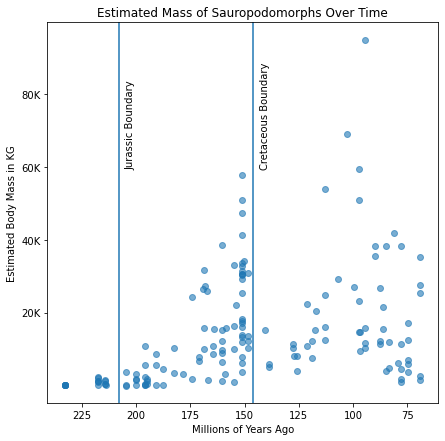

<Figure size 432x288 with 0 Axes>

In [26]:
plt.figure(figsize = (7, 7))
ax = plt.subplot()
plt.scatter(x_values, y_values, alpha = .6)
plt.xlabel('Millions of Years Ago')
plt.ylabel('Estimated Body Mass in KG')
plt.title('Estimated Mass of Sauropodomorphs Over Time')
plt.axvline(x = 208)
plt.text(205, 60000, 'Jurassic Boundary', rotation = 90)
plt.text(143, 60000, 'Cretaceous Boundary', rotation = 90)
plt.axvline(x = 146)
ax.set_yticks([20000, 40000, 60000, 80000])
ax.set_yticklabels(['20K', '40K', '60K', '80K'])
ax.invert_xaxis()
plt.show()
plt.clf()

We can see from this plot that both the number of sauropodomorphs and the variation in size increased dramatically from the Triassic to the end of the Cretaceous. But it also looks like there may have been more sauropodomorphs discovered in the Jurassic than the Cretaceous, despite the longer length of the Cretaceous period. It's also important to keep in mind that this graph only includes data from species with an estimated body mass, so about half the recorded species are missing.

Next I want to look at the variety and count of species in each clade and subclade over time. To do this, I'll use bar charts.

In [27]:
main_diversity_df = summary_df.groupby(['period', 'main_clade']).taxa.count().reset_index()
sub_diversity_df = summary_df.groupby(['period', 'epoch', 'sub_clade']).taxa.count().reset_index()

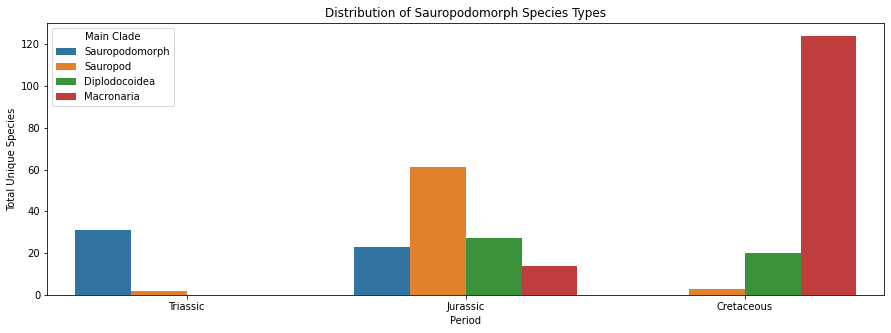

<Figure size 432x288 with 0 Axes>

In [32]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'period', y = 'taxa', hue = 'main_clade', data = main_diversity_df)
plt.xlabel('Period')
plt.ylabel('Total Unique Species')
plt.legend(title = 'Main Clade')
plt.title('Distribution of Sauropodomorph Species Types')
plt.show()
plt.clf()

In [42]:
sub_species_diversity_df = sub_diversity_df[~sub_diversity_df.sub_clade.isin(
    ['Sauropodomorph', 'Sauropod', 'Diplodocoidea', 'Macronaria'])]
sub_species_diversity_df = sub_species_diversity_df[sub_species_diversity_df.taxa != 0]
sub_species_diversity_df['period_epoch'] = sub_species_diversity_df.epoch.astype(str) + ' ' + sub_species_diversity_df.period.astype(str)
sub_species_diversity_df.head()

,period,epoch,sub_clade,taxa,period_epoch
64,Jurassic,Late,Diplodocinae,6,Late Jurassic
66,Jurassic,Late,Apatosaurinae,5,Late Jurassic
68,Jurassic,Late,Somphospondyli,1,Late Jurassic
69,Jurassic,Late,Brachiosauridae,5,Late Jurassic
76,Cretaceous,Early,Diplodocinae,1,Early Cretaceous


In [48]:
sub_species_diversity_df['sub_clade'] = pd.Categorical(sub_species_diversity_df['sub_clade'],
                                         ['Diplodocinae', 'Limaysaurinae', 'Apatosaurinae', 'Nigersaurinae',
                                         'Somphospondyli', 'Brachiosauridae', 'Euhelopodidae', 'Titanosauria'],
                                         ordered = True)

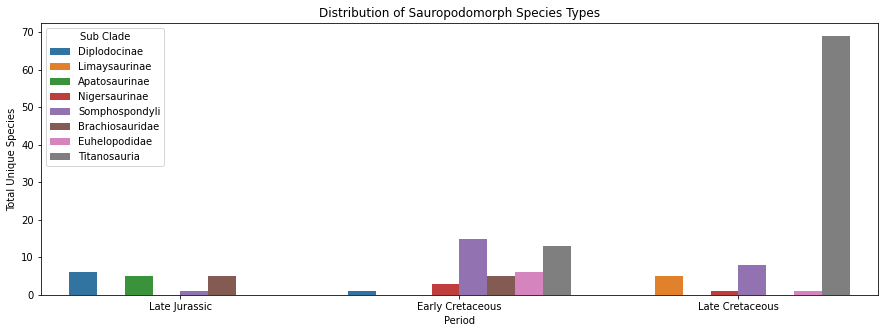

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'period_epoch', y = 'taxa', hue = 'sub_clade', data = sub_species_diversity_df)
plt.xlabel('Period')
plt.ylabel('Total Unique Species')
plt.legend(title = 'Sub Clade', loc = 2)
plt.title('Distribution of Sauropodomorph Species Types')
plt.show()
plt.clf()

Based on these two graphs, we can conclude that sauropodomorph diversity was highest during the Cretaceous period, with most of the subclades only appearing or reaching their height in that period. The Triassic period had the highest number of sauropodomorph species, the most basal of all the clades. Diversity increased during the Jurassic and peaked in the Cretaceous, with the largest number of titanosaurs appearing only in the late Cretaceous.

Finally, I'm going to pull a quick calculation for the total number of unique species in each period.

In [50]:
species_per_period = summary_df.groupby('period').taxa.count().reset_index()
species_per_period

,period,taxa
0,Triassic,33
1,Jurassic,125
2,Cretaceous,147


Unlike the scatterplot suggested, the Cretaceous had the highest number of unique sauropodomorph species, though not by much. The Jurassic looked like it may have had more species because the similar number of species was grouped into a smaller time period.

## Which clades of sauropodomorphs do we have the most fossil specimens of?

For this question, I'll need to combine the summary_df and the completeness_df.

In [65]:
all_data_df = pd.merge(summary_df, completeness_df, how = 'right')
all_data_df.head()

,main_clade,sub_clade,taxa,year_found,completeness,hemisphere,continent,country,mod_lat,paleo_lat,...,min_ma,body_mass_est,skull,vertebrae,ribs,pectorals,forelimb,pelvis,hindlimb,total
0,Sauropodomorph,Sauropodomorph,Aardonyx celestae,2010.0,32.673313,S,Africa,South Africa,-28.466389,-42.64,...,190.8,NaN,0.100000,0.0,0.0000,0.0,0.0,0.0,0.00,0.100000
1,Sauropodomorph,Sauropodomorph,Aardonyx celestae,2010.0,32.673313,S,Africa,South Africa,-28.466389,-42.64,...,190.8,NaN,0.133333,0.2,0.0000,0.0,3.0,0.0,0.25,3.583333
2,Sauropodomorph,Sauropodomorph,Aardonyx celestae,2010.0,32.673313,S,Africa,South Africa,-28.466389,-42.64,...,190.8,NaN,0.000000,10.0,0.1875,0.0,0.0,0.0,0.00,10.187500
3,Sauropodomorph,Sauropodomorph,Aardonyx celestae,2010.0,32.673313,S,Africa,South Africa,-28.466389,-42.64,...,190.8,NaN,0.000000,0.0,0.1875,0.0,0.0,0.0,0.00,0.187500
4,Sauropodomorph,Sauropodomorph,Aardonyx celestae,2010.0,32.673313,S,Africa,South Africa,-28.466389,-42.64,...,190.8,NaN,0.000000,0.0,0.1875,0.0,0.0,0.0,0.00,0.187500


In [79]:
all_data_df[['main_clade', 'sub_clade']].value_counts()

main_clade      sub_clade      
Sauropodomorph  Sauropodomorph     346
Macronaria      Titanosauria       234
Sauropod        Sauropod           206
Diplodocoidea   Diplodocoidea       84
Macronaria      Macronaria          76
                Somphospondyli      49
                Brachiosauridae     48
Diplodocoidea   Diplodocinae        44
                Apatosaurinae       23
                Limaysaurinae        5
Macronaria      Euhelopodidae        2
Diplodocoidea   Nigersaurinae        2
dtype: int64

It looks like we've found the most fossils from the Sauropodomorph clade, followed by the Titanosauria. Which species do we have the most fossils for?

In [81]:
all_data_df[['sub_clade', 'taxa']].value_counts()

sub_clade       taxa                            
Sauropodomorph  Aardonyx celestae                   175
Sauropod        Moabosaurus utahensis                58
Sauropodomorph  Sefapanosaurus zastronensis          46
Titanosauria    Atsinganosaurus velauciensis         38
                Alamosaurus sanjuanensis             26
                                                   ... 
                Austroposeidon magnificus             1
Sauropod        Xinjiangtitan shanshanesis            1
                Zby atlanticus                        1
Diplodocoidea   Amargatitanis macni                   1
Titanosauria    Zhuchengtitan zangjiazhuangensis      1
Length: 167, dtype: int64

The [Aardonyx celestae](https://www.nhm.ac.uk/discover/dino-directory/aardonyx.html) a sauropodomorph that lived in the early Jurassic, has by far the most found fossil specimens at 175. Interestingly, the titanousar with the most number of fossils found is fourth in the list at just 38 specimens, even though Titanousauria is the clade with the second most fossils found. Probably this is because there are a lot of titanosaur species, as we saw earlier.

Finally I want to compute the fossils found per species for each clade and subclade.

In [90]:
clades_and_fossils_df = all_data_df.groupby(['main_clade', 'sub_clade']).agg(
    {'taxa': lambda x: x.nunique(), 'total': lambda x: x.count()}).reset_index()
clades_and_fossils_df = clades_and_fossils_df.dropna()

In [95]:
clades_and_fossils_df['fossils_per_species'] = clades_and_fossils_df.total / clades_and_fossils_df.taxa
clades_and_fossils_df.sort_values(by = ['fossils_per_species'], ascending = False)

,main_clade,sub_clade,taxa,total,fossils_per_species
0,Sauropodomorph,Sauropodomorph,29.0,346.0,11.931034
39,Macronaria,Macronaria,7.0,76.0,10.857143
45,Macronaria,Brachiosauridae,6.0,48.0,8.000000
26,Diplodocoidea,Diplodocoidea,12.0,84.0,7.000000
13,Sauropod,Sauropod,31.0,206.0,6.645161
28,Diplodocoidea,Diplodocinae,7.0,44.0,6.285714
30,Diplodocoidea,Apatosaurinae,4.0,23.0,5.750000
29,Diplodocoidea,Limaysaurinae,1.0,5.0,5.000000
47,Macronaria,Titanosauria,52.0,234.0,4.500000
44,Macronaria,Somphospondyli,14.0,49.0,3.500000


Again we can see that the Sauropodomorph clade had the most fossils per species at nearly 12, though if you took away Aardonyx celestae you'd likely have fewer. The Macronaria had the second most fossils per species at almost 11, and the Titanosauria are near the bottom at 4.5. But Titanosauria has the most species at 52, so even with a low fossil count per species there are still a lot of Titanosauria fossils.

## Has the rate of discovery of species increased or decreased since we identified the first sauropodomorph?

For this question I want to look at the year_found column in the summary_df. I'll start with a scatterplot to visualize species discovered per year.

In [96]:
species_per_year_df = summary_df.groupby('year_found').taxa.count().reset_index()
species_per_year_df.head()

,year_found,taxa
0,1837.0,1
1,1842.0,1
2,1849.0,1
3,1852.0,1
4,1854.0,1


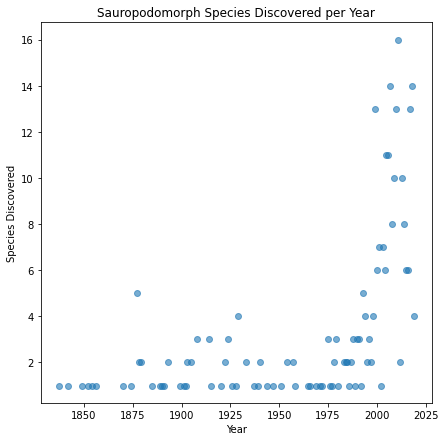

<Figure size 432x288 with 0 Axes>

In [97]:
plt.figure(figsize = (7, 7))
ax = plt.subplot()
plt.scatter(species_per_year_df.year_found, species_per_year_df.taxa, alpha = .6)
plt.xlabel('Year')
plt.ylabel('Species Discovered')
plt.title('Sauropodomorph Species Discovered per Year')
plt.show()
plt.clf()

It looks like there's been an exponential increase in sauropodomorph species discovery since the first species was discovered in 1837. Especially since the year 2000, the rate of species discovered per year has gone from below 5 to regularly 10 or over.

## Where did the oldest sauropodomorphs live, and how did they spread across the globe?

For this question, I want to count species per continent for each of the three periods, and possibly the epochs as well.

In [107]:
species_per_continent = summary_df.groupby(['period', 'epoch', 'continent']).taxa.count().reset_index()
species_per_continent = species_per_continent[species_per_continent.taxa != 0]
species_per_continent['period_epoch'] = species_per_continent.epoch.astype(str) + ' ' + species_per_continent.period.astype(str)
species_per_continent.head()

,period,epoch,continent,taxa,period_epoch
6,Triassic,Early,South America,1,Early Triassic
14,Triassic,Late,Africa,7,Late Triassic
16,Triassic,Late,Asia,2,Late Triassic
18,Triassic,Late,Europe,9,Late Triassic
20,Triassic,Late,South America,14,Late Triassic


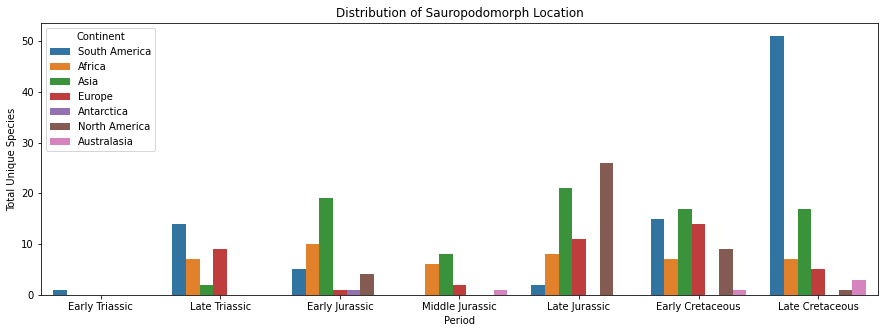

<Figure size 432x288 with 0 Axes>

In [108]:
plt.figure(figsize = (15, 5))
sns.barplot(x = 'period_epoch', y = 'taxa', hue = 'continent', data = species_per_continent)
plt.xlabel('Period')
plt.ylabel('Total Unique Species')
plt.legend(title = 'Continent', loc = 2)
plt.title('Distribution of Sauropodomorph Location')
plt.show()
plt.clf()

Breaking things down into epoch was really helpful here. I can see that the earliest known sauropodomorph was found in South America in the early Triassic. The sauropodomorphs then spread further across South America and into Africa, Asia, and Europe. They didn't appear in the rest of the continents until the Jurassic period, and were most present in Asia and North America during the Jurassic.

There was a resurgence in sauropodomorph diversity in South America in the Cretaceous. I've read that most titanosaurs have been found in South America, so it makes sense that we'd see a big jump in South American sauropodomorphs along with the jump in titanosaur species.

## What bones are the most likely to fossilize, based on the fossil specimens we have found so far?

For this final question, I'll be looking at the completeness_df, which lists fossils found based on location in the skeleton. The data is for body completeness, so there are two ways to work with it. The first is counting the instances, which should reveal the number of individual, say, rib bones found for sauropodomorph species. The second is to sum the values, which will reveal the level of completeness of skeleton for each fossil type.

In [109]:
completeness_df.head()

,taxa,skull,vertebrae,ribs,pectorals,forelimb,pelvis,hindlimb,total
0,Aardonyx celestae,0.100000,0.0,0.0000,0.0,0.0,0.0,0.00,0.100000
1,Aardonyx celestae,0.133333,0.2,0.0000,0.0,3.0,0.0,0.25,3.583333
2,Aardonyx celestae,0.000000,10.0,0.1875,0.0,0.0,0.0,0.00,10.187500
3,Aardonyx celestae,0.000000,0.0,0.1875,0.0,0.0,0.0,0.00,0.187500
4,Aardonyx celestae,0.000000,0.0,0.1875,0.0,0.0,0.0,0.00,0.187500


In [120]:
types = list(completeness_df)
types = types[1:8]
types

['skull', 'vertebrae', 'ribs', 'pectorals', 'forelimb', 'pelvis', 'hindlimb']

Now I'll calculate the sum of all percentages for each skeleton type

In [129]:
for type in types:
    print(type + ': ' + str(round(completeness_df[type].sum(),2)))

skull: 999.06
vertebrae: 8321.43
ribs: 1081.53
pectorals: 925.77
forelimb: 2120.26
pelvis: 1396.72
hindlimb: 2332.57


In terms of total percentage sum, we have the most fossils of vertebrae. Now I want to see if we've also found the most vertebrae as opposed to other skeleton parts by count.

In [130]:
for type in types:
    print(type + ': ' + str(completeness_df[type].astype(bool).sum(axis = 0)))

skull: 318
vertebrae: 756
ribs: 422
pectorals: 378
forelimb: 442
pelvis: 446
hindlimb: 521


We have also found the most vertebrae out of any kind of skeleton type. For a creature as long as a sauropod, this makes sense. There are a lot of vertebrae!

## Conclusion

These are the questions I answered with my data analysis for this final project:

- How did size and diversity of sauropodomorphs change throughout the Mezozoic Era?

The earliest sauropodomorphs in the Triassic Period were small and did not have much variation in body size or diversity. The most common clade was the basal Sauropodomorph, with only a few true sauropods.

In the Jurassic, sauropodomorphs exploded in diversity in both clade and body mass. Though there were still many sauropodomorphs around, there were many more sauropods in the Jurassic Period and we also started to see members of the Diplodocoidea and Macronaria clades, which gave rise to some of the most well-known species of sauropod.

In the Cretaceous Period we saw the greatest diveristy of sauropodomorphs, both in body size and clade. In the early Cretaceous members of the Titanosauria clade first appeared, and by the late Cretaceous these were the most successful group of sauropodomorphs. The more basal Sauropodomorph clade disappeared entirely in the Cretaceous.

- Which clades of sauropodomorphs do we have the most fossil specimens of?

The [Aardonyx celestae](https://www.nhm.ac.uk/discover/dino-directory/aardonyx.html) a Sauropodomorph that lived in the early Jurassic, has by far the most found fossil specimens at 175. This also makes Sauropodomorphs the clade with the most fossil speciems overall at 346. In second place are the Titanosauria at 234. The Titanosauria's high numbers are not due to a large number of fossil specimens from one species, but from a decent number of fossil specimens from many different species.

- Has the rate of discovery of species increased or decreased since we identified the first sauropodomorph?

The rate of discovery of new sauropodomorph species has increased dramatically since we identified the first sauropodomorph in 1837. Especially since the year 2000, the rate of species discovered per year has gone from below 5 to regularly 10 or over.

- Where did the oldest sauropodomorphs live, and how did they spread across the globe?

The oldest sauropodomorph found was a single species of Sauropodomorph living in South America in the early Triassic. In the late Triassic, sauropodomorphs spread out further across South America and into Asia, Africa, and Europe. 

During the Jurassic Period, sauropodomorphs arrived in North America and were most prevalent there, along with Asia. Then in the Cretaceous there was a big resurgence of sauropodomorphs in South America, especially during the late Cretaceous. I did not verify this with the data, but I have read that most Titanosauria have been found in South America, so it seems likely that the surge in species count during this time is because of the surge in Titanosauria species.

- What bones are the most likely to fossilize, based on the fossil specimens we have found so far?

Based on the fossil specimens we have found so far, vertebrae (spine bones) are the most likely to fossilize and/or the most likely to be discovered. Of the fossil specimens recorded in the data, 756 were vertebrae. That's 23% of all the fossil specimens recorded. 

## Next Steps

This data was a lot of fun to work with, and there's much more that we can do from here:

- Combine this data with data from other types of dinosaurs, such as theropods.
- Analyze if there is a relationship between estimated body mass and skeleton completeness (do larger dinosaurs make better fossils?)
- I didn't use it here, but in addition to modern and paleo latitude the summary sheet included in the initial data also had columns for modern and paleo longitude. This could be used to graph the spread of sauropodomorphs on a map.
- Break out location data by subclade or even taxa. Were there really more titanosaurs in South America?